In [1]:
import numpy as np

from src.Lab import Lab

# Settings
height = 200
width = 200
init_pop_count = 10

# Init lab
lab = Lab(height=height, width=width, init_population_count=init_pop_count)

In [2]:
lab.experiment(duration=2)

Living: 0 | Dead: 1846
Agents mean path len = 1 px
Agents median path len = 2 px


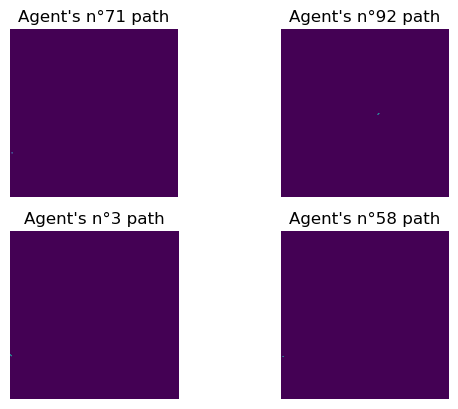

In [3]:
lab.analyze(n_viz=4)

In [ ]:
import imageio
timeline = lab.generate_actions_timeline(time_step=1e8)
images = []
from matplotlib import pyplot as plt

for t in timeline:
    images.append(t)

In [5]:
imageio.mimsave('results/output.gif', images, duration=0.01, loop=0)